# Rate of return


Simple Rate of return = (after price - beginning price)/begining price
 - prefrable when dealing with multiple asset over a timeframe
 
 
Logarithmic Rate of return = log(after price/begining price) 
   - One asset over time
   
 annual return = [(daily return + 1)^365] * 100

In [2]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
PG = wb.DataReader("PG", data_source='yahoo', start='1995-1-1')

In [4]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.820023
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.757339
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.647636
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.663311
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.631965


In [5]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-14,143.559998,140.259995,140.509995,140.979996,8516200.0,140.979996
2022-11-15,143.199997,139.699997,142.089996,140.490005,7732400.0,140.490005
2022-11-16,142.910004,140.979996,141.500000,141.740005,6193700.0,141.740005
2022-11-17,141.690002,139.860001,141.110001,140.869995,5186300.0,140.869995
2022-11-18,142.759995,141.270004,141.919998,142.570007,5671400.0,142.570007


## Simple Rate of Return

(after price - beginning price)/beginning price = after price/beginning price - 1 

In [10]:
PG["simple_return"] = PG["Adj Close"]/PG["Adj Close"].shift(1) - 1
print(PG["simple_return"])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002050
1995-01-09   -0.004090
                ...   
2022-11-14    0.000071
2022-11-15   -0.003476
2022-11-16    0.008897
2022-11-17   -0.006138
2022-11-18    0.012068
Name: simple_return, Length: 7022, dtype: float64


<AxesSubplot:xlabel='Date'>

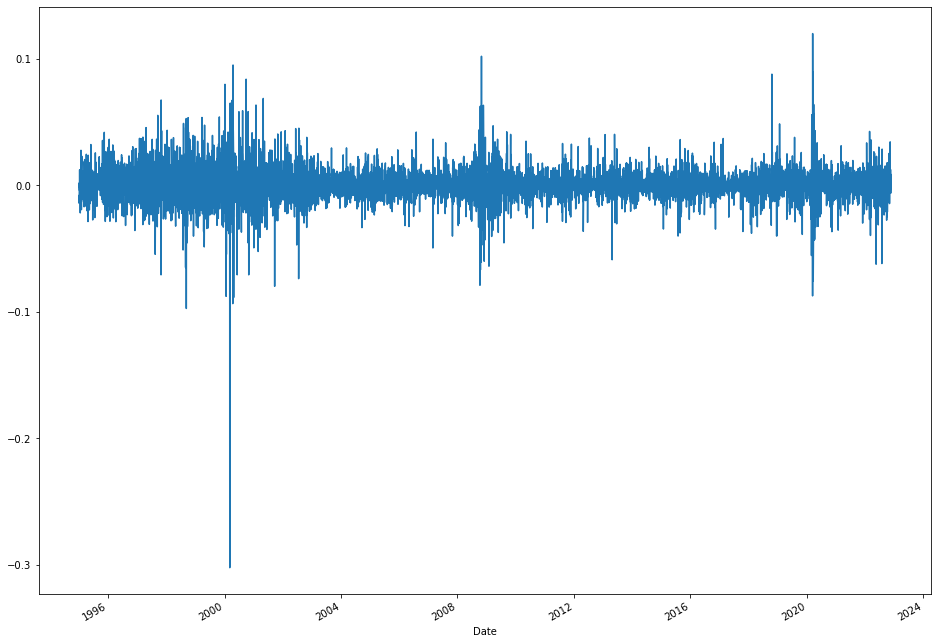

In [11]:
PG['simple_return'].plot(figsize=(16, 12))

In [13]:
# Avarage daily returns
avg_returns_d = PG["simple_return"].mean()
avg_returns_d

0.0005138295354874062

In [14]:
# Avarage annaul returns 
avg_returns_a = PG["simple_return"].mean()*250
avg_returns_a

0.12845738387185154

In [32]:
print(f"Avarage annual simple return is {round(avg_returns_a, 5)*100} %")

Avarage annual simple return is 12.845999999999998 %


In [22]:
print("Avarage annual returns"  + str(round(avg_returns_a, 5)*100) +"%")

Avarage annual returns12.845999999999998%


In [19]:
f"{round(avg_returns_a, 5)*100}%" #{THINK }

'12.845999999999998%'

In [23]:
str(round(avg_returns_a, 5)*100)

'12.845999999999998'

## Log returns 

ln(after price/beggining price)

In [24]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.820023,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.757339,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.647636,-0.014142
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.663311,0.002050
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.631965,-0.004090


In [25]:
PG["log_returns"] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
PG["log_returns"].head()

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002048
1995-01-09   -0.004099
Name: log_returns, dtype: float64

<AxesSubplot:xlabel='Date'>

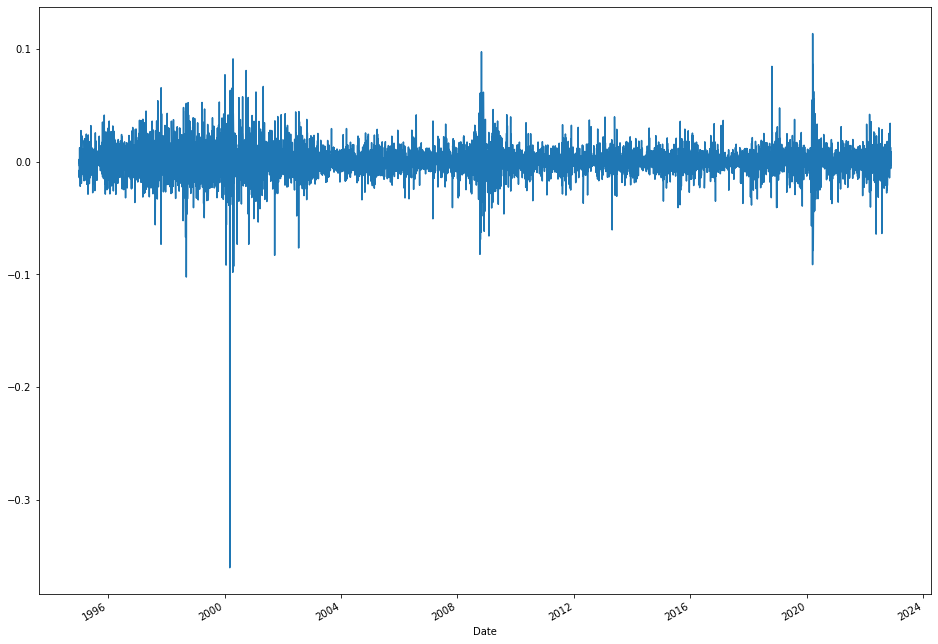

In [26]:
PG["log_returns"].plot(figsize=(16, 12))

In [28]:
# Daily log return 
log_return_d = PG["log_returns"].mean()
log_return_d

0.00041349460976449214

In [29]:
# Annual log return
log_return_a = PG["log_returns"].mean()*250
log_return_a

0.10337365244112304

In [30]:
print(f"Avarage annual Log return is {round(log_return_a, 5)*100} %")

Avarage annual Log return is 10.337 %


# Calculating return of multiple investments
 - Calculating rate of return of porfolio of stocks
 - set of stocks owned by a invester = His portfolio
 

**rate of return = Sum of all rate of return for a security * weight in protfolio**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [37]:
 # Getting data 
tickets = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for ticket in tickets:
    mydata[ticket] = wb.DataReader(ticket, data_source='yahoo', start='1995-1-1')['Adj Close']

In [38]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.820023,2.352808,4.220634,32.767982
1995-01-04,7.757337,2.369911,4.334194,32.767982
1995-01-05,7.647639,2.330821,4.296342,32.848289
1995-01-06,7.663310,2.369911,4.296342,32.687656
1995-01-09,7.631968,2.355252,4.372047,32.366413


In [39]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7022 entries, 1995-01-03 to 2022-11-18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7022 non-null   float64
 1   MSFT    7022 non-null   float64
 2   F       7022 non-null   float64
 3   GE      7022 non-null   float64
dtypes: float64(4)
memory usage: 274.3 KB


In [40]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2022-11-14,140.979996,240.871185,14.06,85.830002
2022-11-15,140.490005,241.290009,14.30,87.139999
2022-11-16,141.740005,241.729996,13.90,84.900002
2022-11-17,140.869995,241.679993,13.91,85.389999
2022-11-18,142.570007,241.220001,13.99,85.480003


## Normailzation to 100  
 - any day price/first day price * 100
 - Idea - used to vaision in prices overtime as if started from same price 

In [42]:
# First row
mydata.iloc[0]

PG       7.820023
MSFT     2.352808
F        4.220634
GE      32.767982
Name: 1995-01-03 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

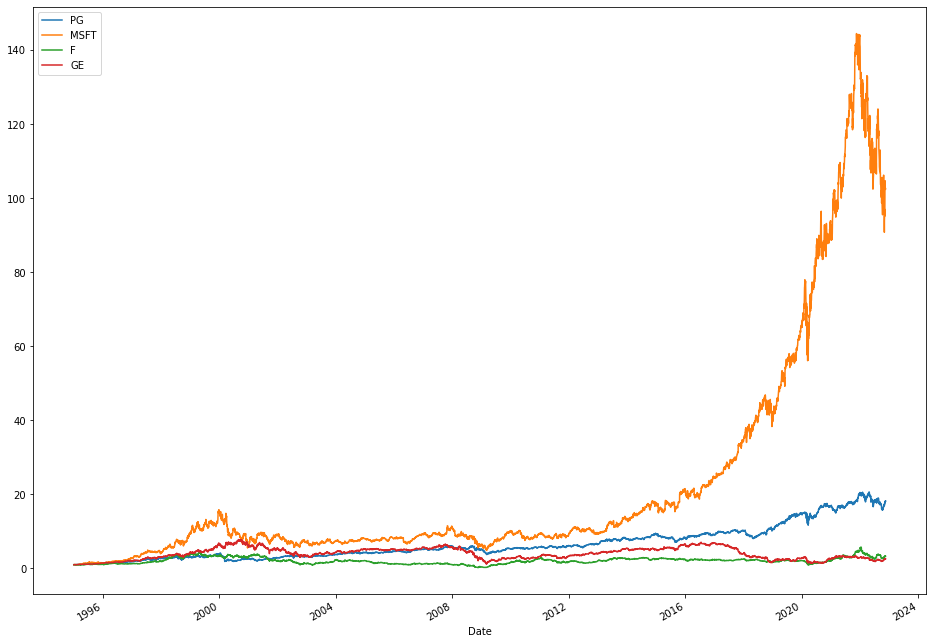

In [43]:
# Idea = 
(mydata/mydata.iloc[0]).plot(figsize=(16, 12))

<AxesSubplot:xlabel='Date'>

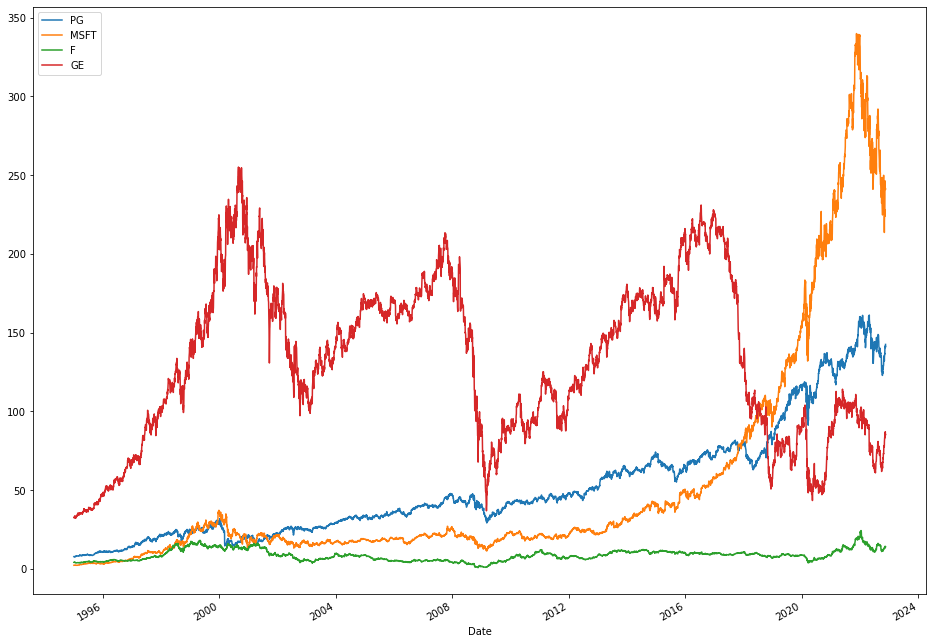

In [44]:
# If not normalised 
mydata.plot(figsize=(16, 12))

## Calculating the Return of a porfolio of Seurities

In [59]:
returns = (mydata/mydata.shift(1)) -1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016494,-0.008733,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [61]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [62]:
np.dot(returns, weights)

array([            nan,  6.53969054e-03, -9.22951215e-03, ...,
       -1.07392238e-02,  3.64961164e-05,  4.24248245e-03])

In [65]:
annual_returns = returns.mean()*250
annual_returns

PG      0.128457
MSFT    0.214313
F       0.123881
GE      0.085825
dtype: float64

In [72]:
portfolio_return_1 = np.dot(annual_returns, weights)

In [73]:
print(f"Annual portfolio return(in this case) {round(portfolio_return_1, 5)*100}%")

Annual portfolio return(in this case) 13.812%


Different weights 

In [71]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [77]:
portfolio_returns_2 = np.dot(annual_returns, weights_2)
portfolio_returns_2

0.15998173413597128

In [79]:
print(f"Annual portfolio return(in this case) {round(portfolio_returns_2, 5)*100}%")

Annual portfolio return(in this case) 15.998000000000001%


## Market index
 - good proxy for the development of the market (such as S&P500, DOWNJONES etc)
 - Stock indices are excellent comparator to understand how a particular stock is performing

In [88]:
tickers = {
    "S&P500" : '^GSPC',
    "NASDAQ": '^IXIC',
    "German DAX": '^GDAXI'
}

ind_data = pd.DataFrame()

for label, ticker in tickers.items():
    ind_data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start="1997-2-1")['Adj Close']

In [89]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-31,786.159973,1379.849976,3037.699951
1997-02-03,786.729980,1376.050049,3064.699951
1997-02-04,789.260010,1373.750000,3067.479980
1997-02-05,778.280029,1348.439941,3114.729980
1997-02-06,780.150024,1346.400024,3124.780029


In [90]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2022-11-14,3957.250000,11196.219727,14313.299805
2022-11-15,3991.729980,11358.410156,14378.509766
2022-11-16,3958.790039,11183.660156,14234.030273
2022-11-17,3946.560059,11144.959961,14266.379883
2022-11-18,3965.340088,11146.059570,14431.860352


<AxesSubplot:xlabel='Date'>

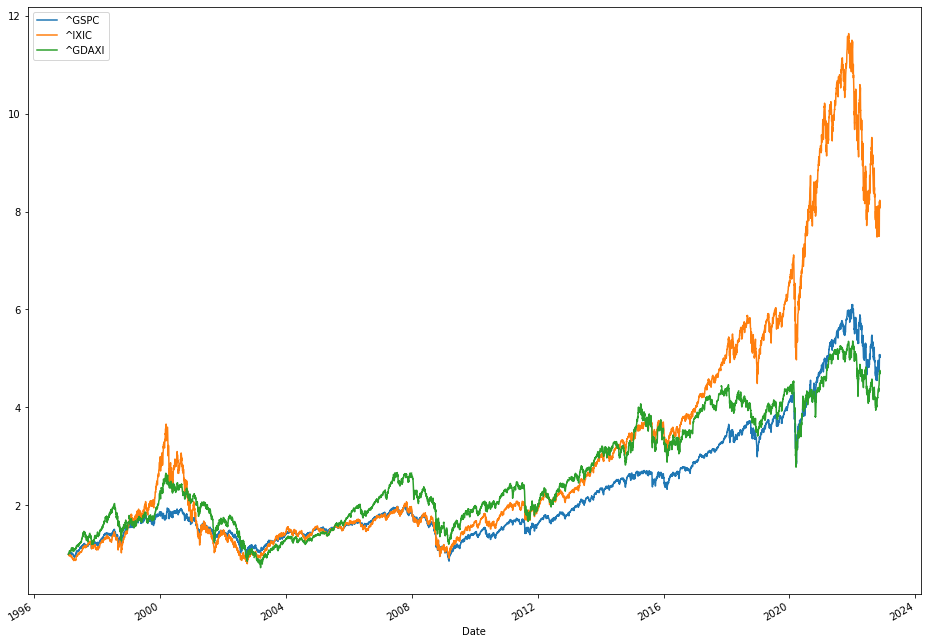

In [91]:
(ind_data/ind_data.iloc[0]).plot(figsize=(16, 12))

In [94]:
# Simple returns
ind_returns = ind_data/ind_data.shift(1) - 1
ind_returns.mean()

^GSPC     0.000327
^IXIC     0.000450
^GDAXI    0.000291
dtype: float64

In [95]:
annual_ind_returns = ind_returns.mean()*250
annual_ind_returns

^GSPC     0.081713
^IXIC     0.112392
^GDAXI    0.072775
dtype: float64

In [97]:
tickers = {
    "Procter & Gamble": "PG",
    'S&P500': "^GSPC",
    'Dow Jones': '^DJI'
}

data_2 = pd.DataFrame()

for label, ticker in tickers.items():
    data_2[ticker] = wb.DataReader(ticker, data_source='yahoo', start="2007-01-01")['Adj Close']

In [98]:
data_2.head()

,PG,^GSPC,^DJI
Date,,,
2007-01-03,40.582497,1416.599976,12474.519531
2007-01-04,40.274399,1418.339966,12480.690430
2007-01-05,39.928566,1409.709961,12398.009766
2007-01-08,40.016579,1412.839966,12423.490234
2007-01-09,39.915981,1412.109985,12416.599609


<AxesSubplot:xlabel='Date'>

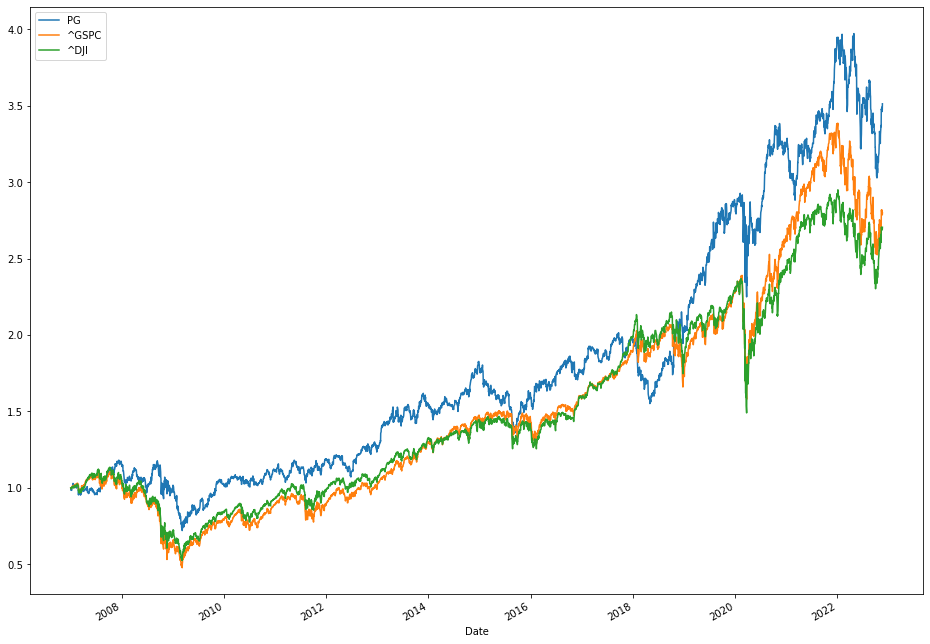

In [99]:
(data_2/data_2.iloc[0]).plot(figsize=(16, 12))